In [1]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import os
import seaborn as sns

In [2]:
df= pd.read_csv("classificationiris.csv")
df.head(4)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [3]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SL                150 non-null float64
SW                150 non-null float64
PL                150 non-null float64
PW                150 non-null float64
Classification    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [9]:
df["Classification"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [7]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

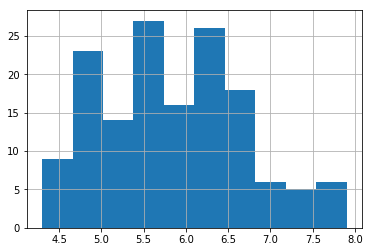

In [10]:
df["SL"].hist()

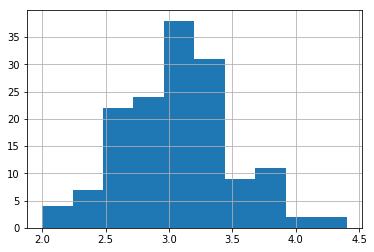

In [11]:
df["SW"].hist()

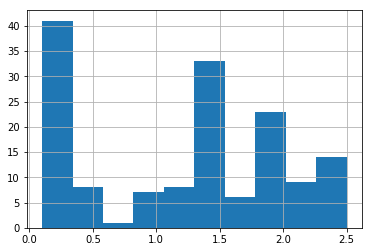

In [12]:
df["PW"].hist()

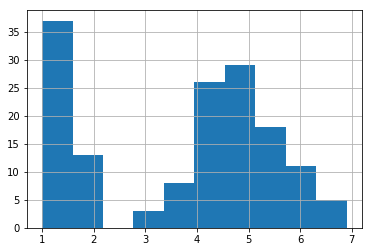

In [13]:
df["PL"].hist()

In [ ]:
sns.scatterplot(x="SL", y="PL", data=df, hue="Classification")

In [ ]:
sns.scatterplot( x="PW",y="SW", data=df, hue="Classification")

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


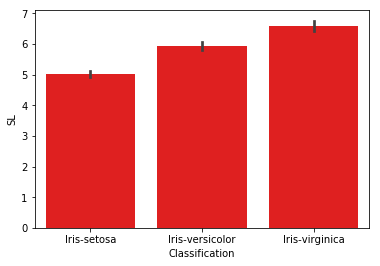

In [14]:
sns.barplot(y="SL" ,x="Classification" , data=df, color="red")

In [15]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.109369,0.871754,0.817954
SW,-0.109369,1.000000,-0.420516,-0.356544
PL,0.871754,-0.420516,1.000000,0.962757
PW,0.817954,-0.356544,0.962757,1.000000


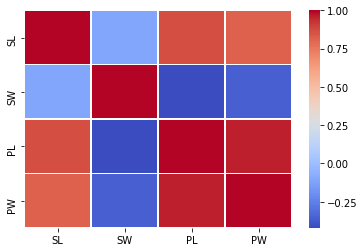

In [16]:
sns.heatmap(df.corr(), cbar=True ,linewidth=0.5,cmap="coolwarm")

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df["Classification"]=le.fit_transform(df['Classification'])
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=["Classification"])
y = df['Classification']
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.20)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model= LogisticRegression()
model.fit(x_train, y_train)
print("Accuracy:",model.score(x_test, y_test)*100)

Accuracy: 96.66666666666667


In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("Accuracy:",model.score(x_test, y_test)*100)

Accuracy: 96.66666666666667


In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Accuracy:",model.score(x_test, y_test)*100)

Accuracy: 100.0
